In [1]:
election <- read.csv("../Data/election_result_ansi.csv", fileEncoding = 'euc-kr')

In [2]:
library(doBy)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [34]:
library(plotrix)

In [3]:
election

X,광역시도,시군,pop,moon,hong,ahn
0,서울특별시,종로구,102566,42512,22325,22313
1,서울특별시,중구,82852,34062,17901,19372
2,서울특별시,용산구,148157,58081,35230,32109
3,서울특별시,성동구,203175,86686,40566,45674
4,서울특별시,광진구,240030,105512,46368,52824
5,서울특별시,동대문구,236092,98958,51631,53359
6,서울특별시,중랑구,265706,111450,56545,62778
7,서울특별시,성북구,295866,129263,57584,66518
8,서울특별시,강북구,210614,89645,42268,51669
9,서울특별시,도봉구,229233,94898,47461,55600


In [18]:
# 문 후보의 서울 득표 Top 5만 득표율로 표시하고 나머지는 기타로 합치기 

# 서울특별시 data만 발췌하기 
# subset(election, 광역시도=="서울특별시") or
election_seoul <- election[election$광역시도 == "서울특별시",]
election_seoul_moon <- orderBy(~ -moon, election_seoul)[,c(3,5)]

In [24]:
# ratio 구하기 
election_seoul_moon[1:5,2] #1~5등
sum(election_seoul_moon[-c(1:5),2]) #기타 

#1~5번째, 기타의 ratio
election_seoul_moon_ratio <- 
    round(c(election_seoul_moon[1:5,2],sum(election_seoul_moon[-c(1:5),2])) / sum(election_seoul_moon$moon) *100,2)

[1] 177328 175882 159854 158167 140180

[1] 1969934

In [25]:
election_seoul_moon_ratio

[1]  6.38  6.32  5.75  5.69  5.04 70.83

In [32]:
# label 만들기 
#1차원 벡터라 []에서 , 사용안해도 됨. 1~5등
#charatcer 값만 가져오려고 하니까 as.character
election_seoul_moon_label <- 
paste(c(as.character(election_seoul_moon$시군[1:5]), "기타"),"\n",
      election_seoul_moon_ratio,"%")

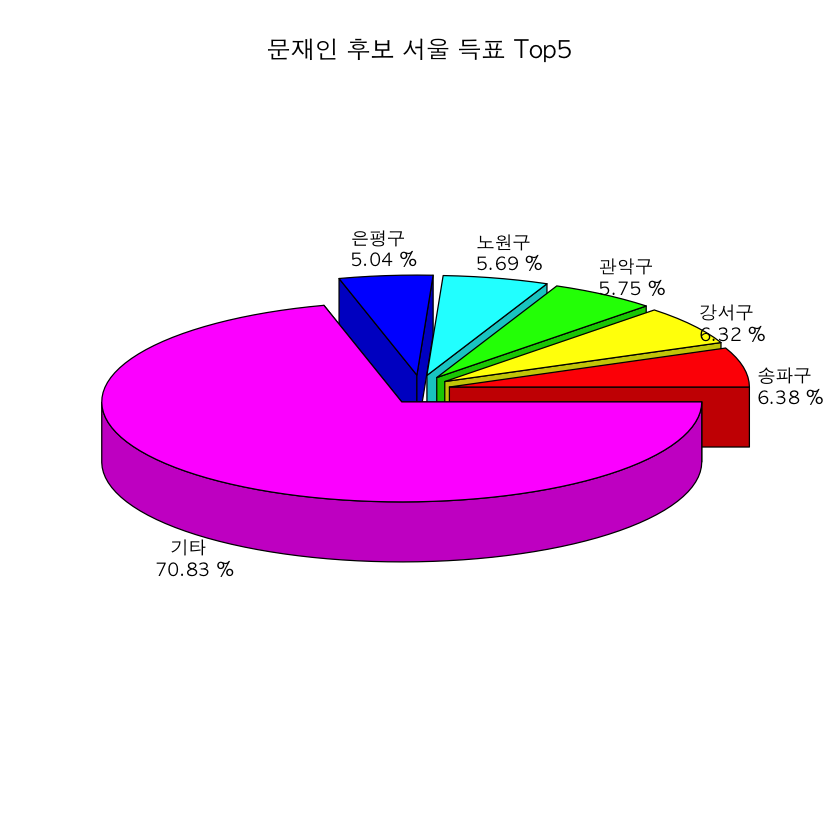

In [37]:
options(warn = -1)
par(family = "AppleGothic")
pie3D(election_seoul_moon_ratio,
     main = "문재인 후보 서울 득표 Top5",
     labels = election_seoul_moon_label,
     labelcex = 0.9,
     explode = 0.1)

In [38]:
# 홍, 안후보도 해보기 (서울에서) -> 서울 득표 Top 5만 득표율로 표시하고 나머지는 기타로 합치기
# zip 파일 보고 다시 한 번 더 하기 -> 출생지별 득표율 분석

In [46]:
# 대선주자 출생지별 득표율 분석 
# 문재인 후보의 출생지는 거제시 
# 기타 = pop에서 문홍안 빼고 나머지 찍은 것
# 문 =sky blue, 홍=red, 안=light green, 기타=light gray


election_g <- election[election$시군 == "거제시",]
election_g
election_etc <- election_g$pop - sum(election_g$moon + election_g$hong + election_g$ahn)
election_etc

,X,광역시도,시군,pop,moon,hong,ahn
238,237,경상남도,거제시,150230,68291,38775,20359


[1] 22805

In [71]:
election_g_ratio <-
 round(c(election_g$moon, election_g$hong, election_g$ahn, election_etc) / sum(election_g$pop) *100,2)
election_g_ratio

[1] 45.46 25.81 13.55 15.18

In [67]:
# label
election_g_label <-
paste(c("문재인","홍준표","안철수","기타"), "\n", election_g_ratio, "%")

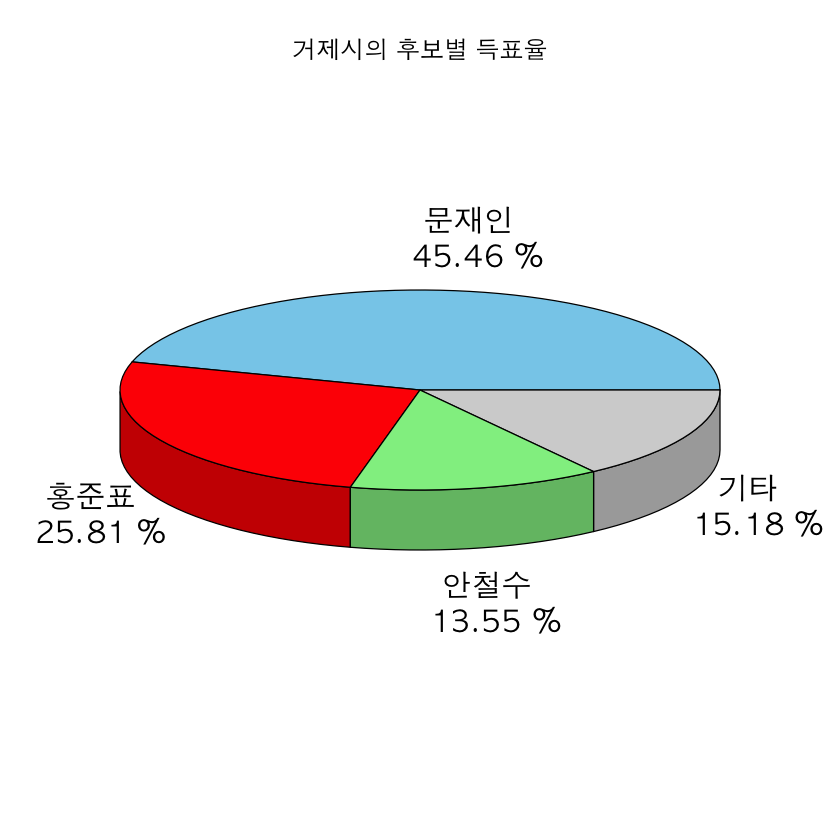

In [70]:
par(family = "AppleGothic")
pie3D(election_g_ratio,
      main = "거제시의 후보별 득표율",
      labels = election_g_label,
     col= c("skyblue","red","light green","light gray"))